In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
import pickle
from src.cort_processor import *
from src.phase_decoder_support import *
from src.decoders import *

from src.neural_analysis import *
from src.wiener_filter import *
from src.filters import *
from src.folder_handler import *
from src.tdt_support import *
from src.plotter import *
from matplotlib.patches import Rectangle

import matplotlib.gridspec
from sklearn import metrics
import scipy
from scipy import integrate
from matplotlib import colors
import matplotlib.collections as mcoll
import matplotlib.path as mpath
from sklearn.metrics import r2_score
from matplotlib.patches import Rectangle
from scipy.stats import pearsonr
import seaborn as sns

In [2]:
UL = 1.2
LL = .5

In [3]:
rollie0302 = CortProcessor('/mnt/c/oobootoo/rat-fes/data/test/rollie/0203-full')
rollie0302.process(clear_storage = False)

read from t=0s to t=408.64s
read from t=0s to t=252.75s


(array([[180., 100., 220., ..., 140., 140., 100.],
        [220., 180., 180., ..., 200., 140., 200.],
        [140., 220., 100., ..., 180., 120., 200.],
        ...,
        [160., 120., 100., ..., 160., 120., 240.],
        [ 20., 160., 140., ..., 140., 180., 220.],
        [ 80.,  80.,  80., ...,  40., 100.,  80.]]),
 array([[ 24.75230494,  67.45695954,  99.11252442, ...,  55.21260268,
          70.95531163, 140.0708985 ],
        [ 18.0551122 ,  57.27813615,  97.6894775 , ...,  58.11853402,
          68.98631647, 139.6072406 ],
        [ 20.89648394,  61.46768585,  99.86372521, ...,  62.82476651,
          67.65432604, 128.10286187],
        ...,
        [ 45.56338561,  76.55500071,  82.44782612, ...,  51.42738538,
          78.0347134 , 143.18009052],
        [ 41.86804303,  72.80972743,  84.9706235 , ...,  54.25060384,
          77.68343017, 138.83454953],
        [ 45.8810283 ,  73.8066047 ,  88.17259619, ...,  50.81613149,
          73.01684151, 133.07064589]]),
 array([1., 0., 

In [5]:
angles = rollie0302.data['angles']
phase = rollie0302.data['phase']
rates = rollie0302.data['rates']

rect_phase_list = []
for i in range(len(phase)):
    phase_copy = np.copy(phase[i])
    for j in range(phase_copy.shape[0]):
        phase_copy[j] = phase_copy[j] + 1
    phase_copy[0] = 0 
    phase_copy[-1] = 0
    rect_phase_list.append(phase_copy)
form_rates, preform_phase = rollie0302.stitch_and_format(rates, rect_phase_list)
form_phase = drop_phase(preform_phase, UL, LL)
phase_12 = form_phase[np.nonzero(form_phase)]
rates_12 = form_rates[np.nonzero(form_phase),:][0]
phase_angles, swing_mean = get_phase_angles(phase_12)
sin_arr, cos_arr = sine_and_cosine(phase_angles)    
# score, h_sin, h_cos, test_rates, test_arctans, predicted_arctans, final_test_index = parallel_decoder(X=rates_12, Y1=sin_arr, Y2=cos_arr, printing = True)

# fascilli_roc(test_arctans, predicted_arctans, swing_mean, score, plotting = True)


In [ ]:
print(h_cos.shape)

In [ ]:
print

In [6]:
fs = rollie0302.tdt_data[0]['fs'] #quick accessible variable
neural = rollie0302.tdt_data[0]['neural'] #quick accessible variable
half_filtered_neural = fresh_filt(neural, 300, 8000, fs, order = 4)
re_filtered_neural = notch_filter(half_filtered_neural, fs)
thresholds = get_autothresholds(re_filtered_neural, fs)
thresholds2 = (thresholds*4)/2.1





In [7]:
print(fs)

24414.0625


In [8]:
tsp = np.linspace(0, (phase_12.shape[0]*50)/1000,phase_12.shape[0])
tsn = np.linspace(0, (re_filtered_neural.shape[0]/fs),re_filtered_neural.shape[0])

In [9]:
tso = np.linspace(0, (predicted_arctans.shape[0]*50/1000),predicted_arctans.shape[0])+tsp[final_test_index[0]]

NameError: name 'predicted_arctans' is not defined

In [ ]:
form_rates.shape

In [ ]:
rates_pre = rates[0][:-10,:]
rates_unshaped = rates_pre[np.nonzero(form_phase),:]
bin_chop = rates_unshaped[0][1500:1979,:]
tsc = tsp[1500:1979]

In [ ]:
np.where(tsp<99)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
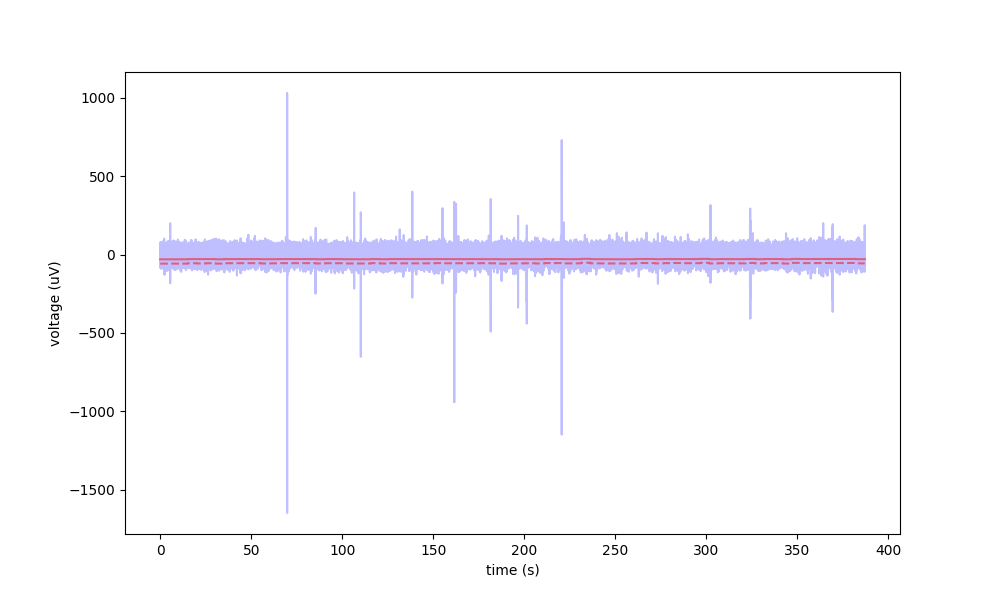

In [11]:
fig1, ax = plt.subplots(1,1, figsize=(10,6), sharey=False)

ax.plot(tsn, re_filtered_neural[:,13], color = 'b', alpha = 0.25, label = 'channel 14 filtered voltage')
ax.set_ylabel('voltage (uV)')
ax.set_xlabel('time (s)')

ax.plot(tsn, thresholds[:,13], color = 'r', alpha = 0.5)
ax.plot(tsn, thresholds2[:,13], color = 'r', linestyle='--', alpha = 0.5)

# ax.set_xlim(149,153)
# ax.set_ylim(-100,100)

(0.0, 360.0)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
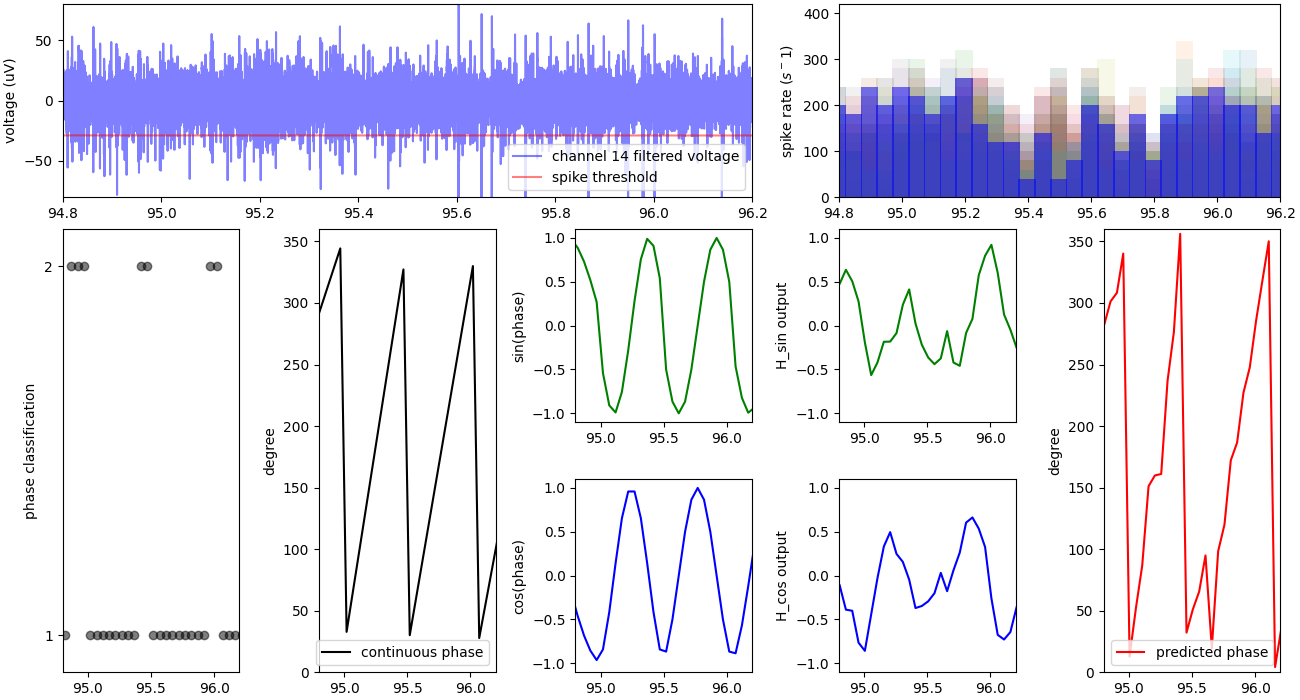

In [18]:
t1 = 94.8
t2 = 96.2

ax = plt.figure(figsize=(13,7),constrained_layout=True).subplot_mosaic(
    """
    AAABB
    DEFHC
    DEGIC
    """,
    # gridspec_kw={'height_ratios':[1,0.75, 0.75],'width_ratios' : [1,0.75,0.75,0.75,1]}    
)
ax['B'].set_xlim(t1,t2)
for i in range(rates_unshaped[0].shape[1]):
    if i != 13:
        ax['B'].bar(x=tsc, height=bin_chop[:,i], width=0.055, align = 'edge', alpha = 0.1)
ax['B'].bar(x=tsc, height=bin_chop[:,13], width=0.055, align = 'edge', color = 'b', alpha = 0.5)
ax['A'].plot(tsn, re_filtered_neural[:,13], color = 'b', alpha = 0.5, label = 'channel 14 filtered voltage')
ax['A'].set_ylabel('voltage (uV)')
ax['B'].set_ylabel('spike rate ($s^-1$)')
ax['A'].plot(tsn, thresholds[:,13], color = 'r', alpha = 0.5, label = 'spike threshold')
ax['D'].scatter(tsp, phase_12, color = 'k', alpha = 0.5, label = 'phase classification')
ax['D'].set_ylim(0.9,2.1)
ax['E'].plot(tsp, phase_angles, color = 'k', alpha = 1, label = 'continuous phase')
ax['E'].set_ylim(0,360)
ax['D'].set_xlim(t1,t2)
ax['A'].set_xlim(t1,t2)
ax['A'].set_ylim(-80,80)
ax['E'].set_xlim(t1,t2)
ax['F'].set_xlim(t1,t2)
ax['G'].set_xlim(t1,t2)
ax['H'].set_xlim(t1,t2)
ax['I'].set_xlim(t1,t2)
ax['C'].set_xlim(t1,t2)
ax['F'].plot(tsp, sin_arr, color = 'g', alpha = 1)
ax['F'].set_ylabel('sin(phase)')
ax['F'].set_ylim(-1.1,1.1)
# ax['F'].sharex(ax['G'])
# ax['G'].shareX(ax['F'])
ax['G'].plot(tsp, cos_arr, color = 'b', alpha = 1)
ax['G'].set_ylabel('cos(phase)')
ax['G'].set_ylim(-1.1,1.1)
sin_pred = test_wiener_filter(test_rates, h_sin)
cos_pred = test_wiener_filter(test_rates, h_cos)
ax['H'].plot(tso, sin_pred, color = 'g', alpha = 1)
ax['H'].set_ylabel('H_sin output')
ax['H'].set_ylim(-1.1,1.1)
# ax['H'].set_xlim(9,11)
ax['I'].plot(tso, cos_pred, color = 'b', alpha = 1)
ax['I'].set_ylabel('H_cos output')
ax['I'].set_ylim(-1.1,1.1)
# ax['I'].set_xlim(9,11)
ax['C'].plot(tso, predicted_arctans, color = 'r', alpha = 1, label = 'predicted phase')
ax['C'].legend(loc='lower right')
ax['A'].legend(loc='lower right')
ax['D'].set_ylabel('phase classification')
ax['E'].set_ylabel('degree')
ax['C'].set_ylabel('degree')

ax['E'].legend(loc='lower right')
# ax['F'].legend(loc='lower right')
# ax['G'].legend(loc='lower right')
# ax['H'].legend(loc='lower right')
# ax['I'].legend(loc='lower right')
ax['D'].set_yticks([1,2])
ax['C'].set_ylim(0,360)
# ax['C'].set_ylabel('predicted phase')
# ax['C'].set_xlim(9,11)
#244.75 - 245.75
#247.5 - 

In [13]:
# print(np.where(tsp< 242))
# print(np.where(tsp> 244))
# [4839:4880,:]
print(tso[0])

49.860010040160645


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
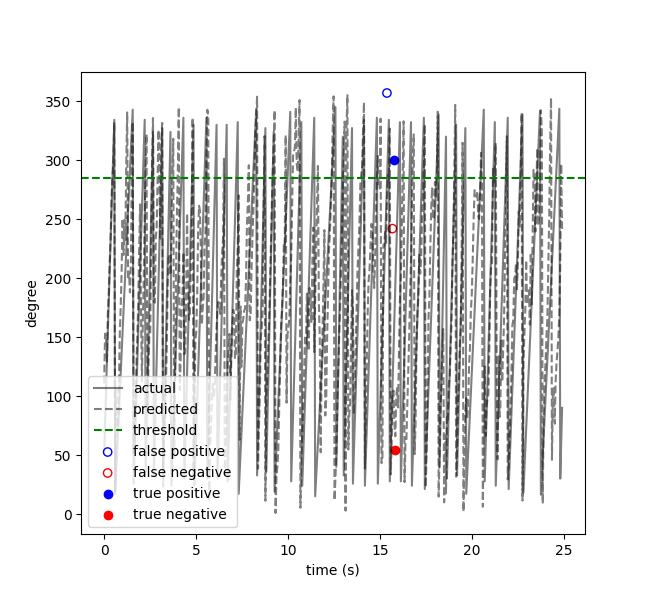

In [14]:
ts1 = np.linspace(0, (test_arctans.shape[0]*50)/1000,test_arctans.shape[0])
fig1, ax = plt.subplots(1,1, figsize=(6.5,6), sharey=False)
ax.plot(ts1, test_arctans, color = 'k', alpha = 0.5, label = 'actual')
ax.plot(ts1, predicted_arctans, color = 'k', alpha = 0.5, label = 'predicted', linestyle = '--')
ax.axhline(y=swing_mean, color = 'g', label = 'threshold', linestyle = '--')
ax.set_ylabel('degree')
ax.set_xlabel('time (s)')
# ax.set_xlim(14.75,16)
ax.scatter(x = 15.375, y=357, label = 'false positive', facecolors='none', edgecolors='b')
ax.scatter(x= 15.673, y=242, label = 'false negative', facecolors='none', edgecolors='r')#, linewidths=3, s=4)
ax.scatter(x=15.775, y=300, label = 'true positive', facecolors='b')
ax.scatter(x=15.823, y=54, label = 'true negative', facecolors='r')
ax.legend(loc = 'lower left')
    #bbox_to_anchor=(1, 1), bbox_transform=ax.transAxes)


In [23]:
import matplotlib.ticker as ticker


(0.0, 6.0)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
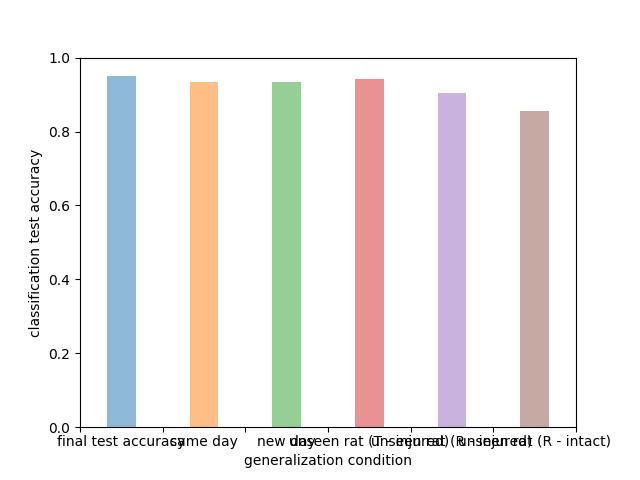

In [37]:


fig = plt.figure()
ax = plt.subplot(111)
# plt.axis('off')
# ax.set_xticklabels(['doo','da','da','da','da','da'])
ax.set_ylim(0,1)
ax.bar(x=0.5, height=0.95, width=.35, bottom=0, align = 'center', alpha = 0.5, label = 'final model')
ax.bar(x=1.5, height=0.9345, width=.35, bottom=0,align = 'center', alpha = 0.5, label = 'same day')
ax.bar(x=2.5, height=0.9327, width=.35, bottom=0,align = 'center', alpha = 0.5, label = 'new day')
ax.bar(x=3.5, height=0.9415, width=.35, bottom=0,align = 'center', alpha = 0.5, label = 'unseen rat (T - injured)')
ax.bar(x=4.5, height=0.9032, width=.35, bottom=0,align = 'center', alpha = 0.5, label = 'unseen rat (R - injured)')
ax.bar(x=5.5, height=0.8546, width=.35, bottom=0,align = 'center', alpha = 0.5, label = 'unseen rat (R - intact)')

ax.set_ylabel('classification test accuracy')
ax.set_xlabel('generalization condition')
ax.tick_params(axis='x', which='minor', tick1On=False, tick2On=False)

ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_locator(ticker.FixedLocator([0.5,1.5,2.5,3.5,4.5,5.5]))
ax.xaxis.set_minor_formatter(ticker.FixedFormatter(['final test accuracy','same day','new day','unseen rat (T - injured)','unseen rat (R - injured)','unseen rat (R - intact)']))

ax.set_xlim(0,6)

# # ax.tick_params(axis='x', which='minor', tick1On=False, tick2On=False)

# # for label in ax.get_xticklabels(minor=True):
# #     label.set_horizontalalignment('center')
# # ax.set_xlabel(['doo','da','da','da','da','da'])

# labels = 'abcdefghij'


# # Shift ticks to be at 0.5, 1.5, etc
# for axis in [ax.xaxis]:
#     axis.set(ticks=np.arange(0.25, len(labels)), ticklabels=labels)



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
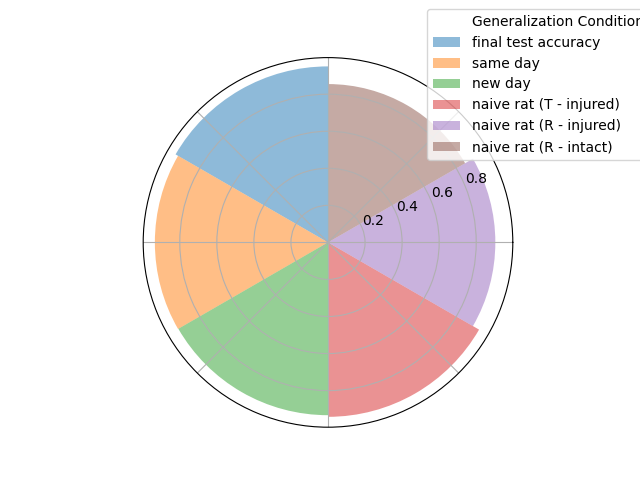

In [80]:
fig = plt.figure()
ax = plt.subplot(111, projection = 'polar')
# plt.axis('off')
ax.set_xticklabels([])
# ax.set_ylabel('Percent Accuracy')
ax.bar(x=0, height=0.8546, width=np.pi/3, bottom=0,align = 'edge', alpha = 0.5, color = 'white', label = 'Generalization Condition:')
ax.bar(x=np.pi/2, height=0.95, width=np.pi/3, bottom=0, align = 'edge', alpha = 0.5, label = 'final test accuracy')
ax.bar(x=-7*np.pi/6, height=0.9345, width=np.pi/3, bottom=0,align = 'edge', alpha = 0.5, label = 'same day')
ax.bar(x=-5*np.pi/6, height=0.9327, width=np.pi/3, bottom=0,align = 'edge', alpha = 0.5, label = 'new day')
ax.bar(x=-np.pi/2, height=0.9415, width=np.pi/3, bottom=0,align = 'edge', alpha = 0.5, label = 'naive rat (T - injured)')
ax.bar(x=-np.pi/6, height=0.9032, width=np.pi/3, bottom=0,align = 'edge', alpha = 0.5, label = 'naive rat (R - injured)')
ax.bar(x=np.pi/6, height=0.8546, width=np.pi/3, bottom=0,align = 'edge', alpha = 0.5, label = 'naive rat (R - intact)')
ax.legend(bbox_to_anchor=(1.4, 1.15), bbox_transform=ax.transAxes)


In [5]:
forelimb = rollie0302.kin_data[0]['angles'][:,6]
shoulder = rollie0302.kin_data[0]['angles'][:,5]
elbow = rollie0302.kin_data[0]['angles'][:,4]
frames = rollie0302.kin_data[0]['fnum']

In [6]:
rollie0302.data['angle_names']

['ankle', 'knee', 'hip', 'limbfoot', 'elbow', 'shoulder', 'forelimb']

Text(0, 0.5, 'joint angle')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
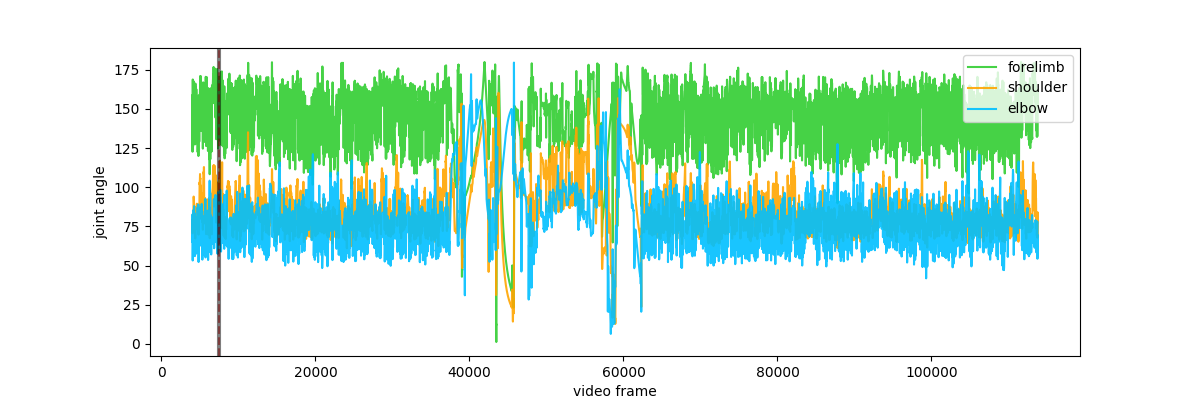

In [9]:
tsa = np.linspace(0, (forelimb.shape[0])/200,forelimb.shape[0])
fig1, ax = plt.subplots(1,1, figsize=(12,4), sharey=False)
ax.plot(frames, forelimb, color = 'limegreen', alpha = 0.9, label = 'forelimb')
ax.plot(frames, shoulder, color = 'orange', alpha = 0.9, label = 'shoulder')
ax.plot(frames, elbow, color = 'deepskyblue', alpha = 0.9, label = 'elbow')
ax.axvline(x=7449, color='r', linestyle = '--', alpha = 0.5)
ax.axvline(x=7349, color='k', alpha = 0.5)
ax.axvline(x=7549, color='k', alpha = 0.5)
ax.legend(loc='upper right')
ax.set_xlabel('video frame')
ax.set_ylabel('joint angle')